The first code uses Seasonal additive/multiplicitive decomposition to calculate averages

Seasonal Component:
 Date
2020-01-31    -4508.052515
2020-02-29    -3865.802515
2020-03-31    -2496.533284
2020-04-30    -2458.302515
2020-05-31    -3501.908284
2020-06-30    -7302.042899
2020-07-31    -6154.494822
2020-08-31    -6717.379438
2020-09-30    -3508.610207
2020-10-31    -1867.658284
2020-11-30    -6838.215976
2020-12-31    -5527.860207
2021-01-31    -4086.542899
2021-02-28    -4514.004438
2021-03-31    12928.966716
Name: seasonal, dtype: float64
Residual Component:
 Date
2020-01-31   NaN
2020-02-29   NaN
2020-03-31   NaN
2020-04-30   NaN
2020-05-31   NaN
2020-06-30   NaN
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
2020-12-31   NaN
2021-01-31   NaN
2021-02-28   NaN
2021-03-31   NaN
Name: resid, dtype: float64


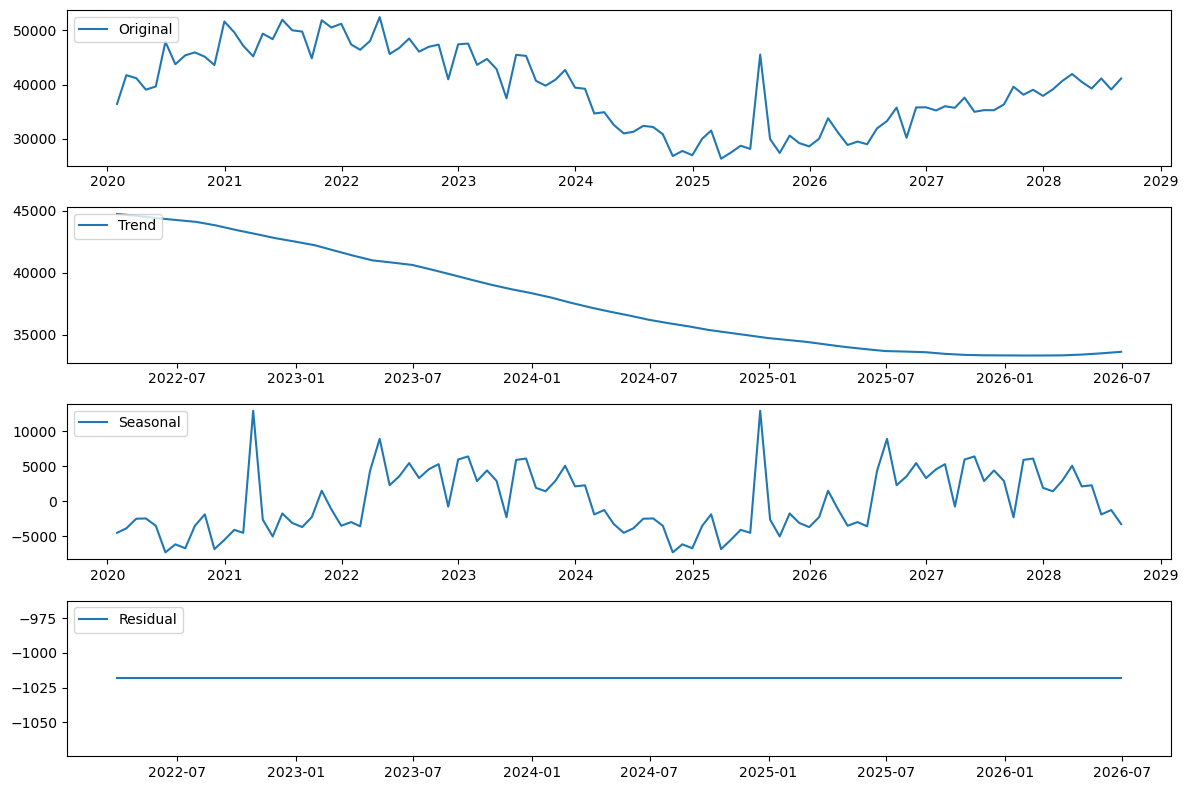

In [99]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Sample time series data
date_range = pd.date_range(start='2020-01-01', periods=104, freq='m')
data = {
    'Date': date_range,
    'TransactionVolume':  [36445, 41752, 41206, 39092, 39671, 47906, 43773, 45422, 
                           45954, 45161, 43621, 51658, 49657, 47182, 45234, 49413, 
                           48398, 51983, 50034, 49799, 44868, 51877, 50548, 51235, 
                           47421, 46434, 48071, 52470, 45663, 46778, 48518, 46092, 
                           46985, 47392, 40996, 47443, 47587, 43666, 44755, 42870, 
                           37487, 45508, 45314, 40717, 39822, 40927, 42718, 39457, 
                           39253, 34690, 34932, 32580, 31016, 31319, 32409, 32193, 
                           30868, 26847, 27783, 26998, 30047, 31543, 26357, 27466, 
                           28736, 28155, 45556, 29955, 27418, 30616, 29224, 28629, 
                           30036, 33815, 31170, 28885, 29510, 29025, 31954, 33305, 
                           35784, 30217, 35814, 35826, 35250, 36027, 35745, 37619, 
                           35005, 35307, 35297, 36360, 39632, 38154, 39063, 37939, 
                           39157, 40682, 41970, 40518, 39292, 41148, 39115, 41145]


}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(df['TransactionVolume'], model='additive', period=52)

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

#print(trend)
#print(residual)
#print(seasonal)

print("Seasonal Component:\n", seasonal.head(15))
print("Residual Component:\n", residual.head(15))

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['TransactionVolume'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



This second code uses a Moving Average to calculate averages

         Week  Transactions    m-MA   2xm-MA
0  2020-01-31         36445     NaN      NaN
1  2020-02-29         41752  451.25  451.250
2  2020-03-31         41206  448.75  450.000
3  2020-04-30         39092  451.50  450.125
4  2020-05-31         39671  451.25  451.375
5  2020-06-30         47906  422.25  436.750
6  2020-07-31         43773  417.75  420.000
7  2020-08-31         45422  412.00  414.875
8  2020-09-30         45954  412.00  412.000
9  2020-10-31         45161  430.00  421.000
10 2020-11-30         43621  429.75  429.875
11 2020-12-31         51658  423.75  426.750
12 2021-01-31         49657  420.25  422.000
13 2021-02-28         47182  419.25  419.750
14 2021-03-31         45234  442.00  430.625
15 2021-04-30         49413  459.25  450.625
16 2021-05-31         48398  486.75  473.000
17 2021-06-30         51983  495.75  491.250
18 2021-07-31         50034  500.75  498.250
19 2021-08-31         49799  491.00  495.875
20 2021-09-30         44868  475.00  483.000
21 2021-10

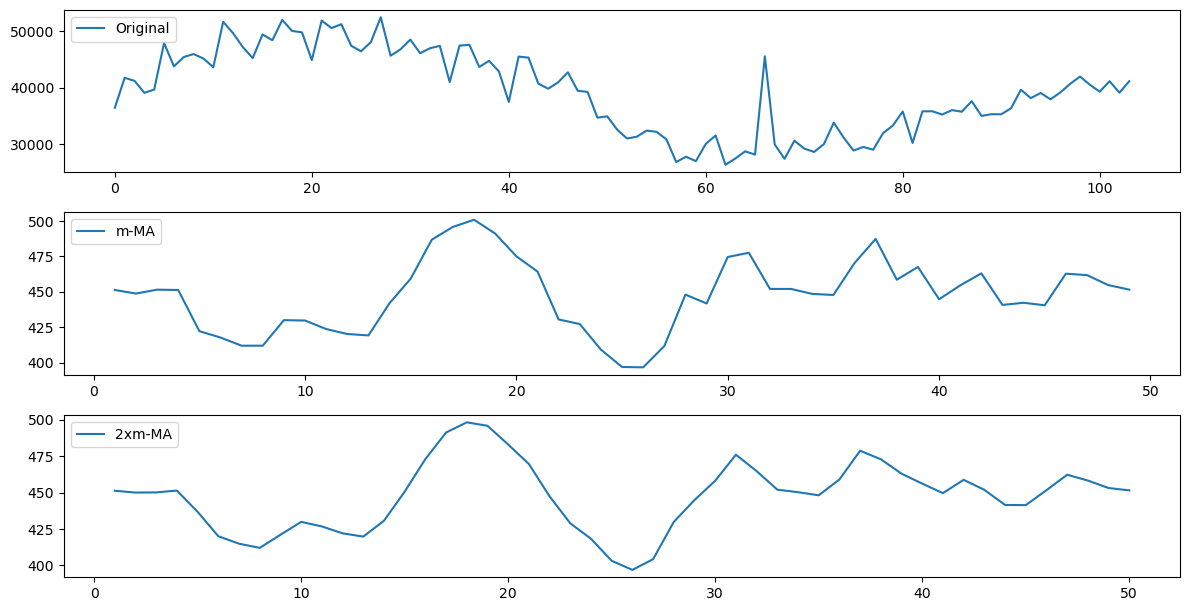

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#sample data
date_range = pd.date_range(start='2020-01-01', periods=104, freq='m')
df = pd.DataFrame({'Week': date_range, 
                   'Transactions': [36445, 41752, 41206, 39092, 39671, 47906, 43773, 45422, 
                           45954, 45161, 43621, 51658, 49657, 47182, 45234, 49413, 
                           48398, 51983, 50034, 49799, 44868, 51877, 50548, 51235, 
                           47421, 46434, 48071, 52470, 45663, 46778, 48518, 46092, 
                           46985, 47392, 40996, 47443, 47587, 43666, 44755, 42870, 
                           37487, 45508, 45314, 40717, 39822, 40927, 42718, 39457, 
                           39253, 34690, 34932, 32580, 31016, 31319, 32409, 32193, 
                           30868, 26847, 27783, 26998, 30047, 31543, 26357, 27466, 
                           28736, 28155, 45556, 29955, 27418, 30616, 29224, 28629, 
                           30036, 33815, 31170, 28885, 29510, 29025, 31954, 33305, 
                           35784, 30217, 35814, 35826, 35250, 36027, 35745, 37619, 
                           35005, 35307, 35297, 36360, 39632, 38154, 39063, 37939, 
                           39157, 40682, 41970, 40518, 39292, 41148, 39115, 41145
]})

# Filtering the data
transactions = df[df['Week'] >= '2020-01-01'][['Week', 'Transactions']]

# Defining custom rolling mean functions
def custom_rolling_mean(series, window_before, window_after):
    result = []
    for i in range(len(series)):
        window = series[max(0, i-window_before):min(len(series), i+window_after+1)]
        if len(window) < (window_before + window_after + 1):
            result.append(np.nan)
        else:
            result.append(window.mean())
    return pd.Series(result, index=series.index)

# Calculate m-MA, numbers can be tweaked to have different windows for MA
transactions['m-MA'] = custom_rolling_mean(beer['Transactions'], 1, 2)

# Calculate 2xm-MA
transactions['2xm-MA'] = transactions['m-MA'].rolling(window=2, min_periods=1).mean()

print(transactions.head(52))

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Transactions'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(transactions['m-MA'], label='m-MA')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(transactions['2xm-MA'], label='2xm-MA')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The third code is using the SEATS (Seasonal Extraction in ARIMA Time Series) method, a version of 11-ARIMA developed by the bank of Spain. SEATS only handles monthly or quarterly data

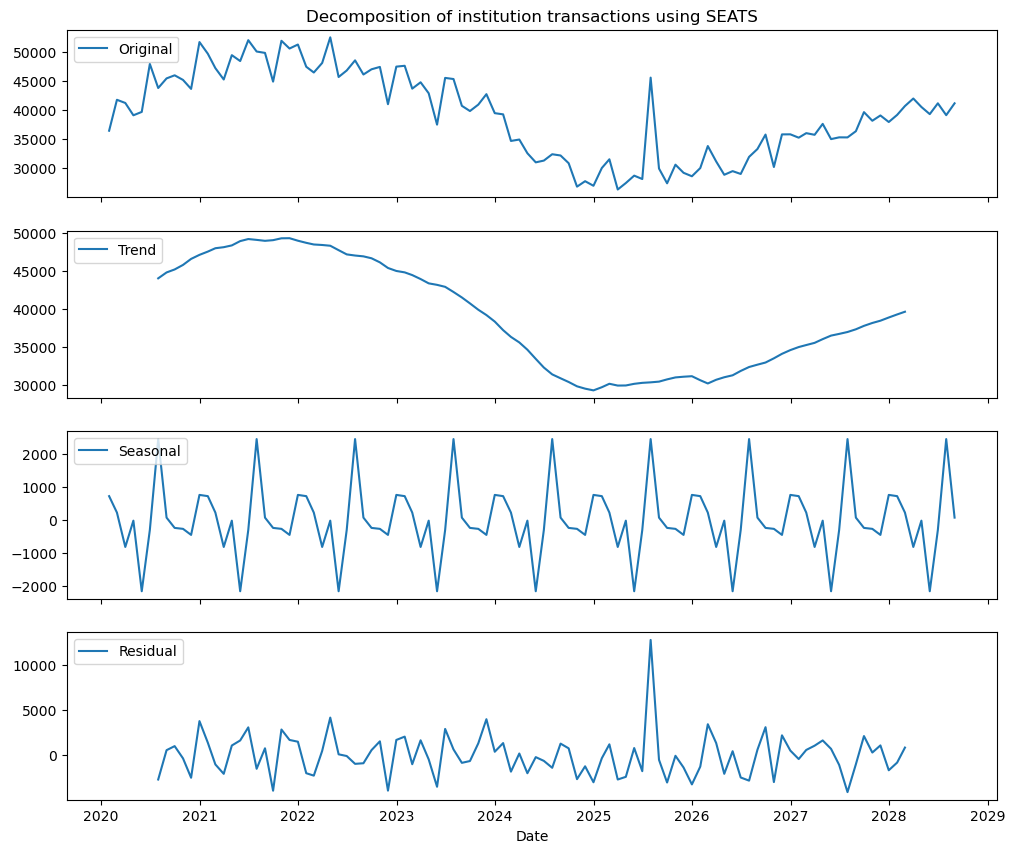

            Transactions
Date                    
2020-01-31         36445
2020-02-29         41752
2020-03-31         41206
2020-04-30         39092
2020-05-31         39671
...                  ...
2028-04-30         40518
2028-05-31         39292
2028-06-30         41148
2028-07-31         39115
2028-08-31         41145

[104 rows x 1 columns]


In [91]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Sample data for illustration (replace with actual dataset)
dates = pd.date_range(start='2020-01-01', periods=104, freq='m')
data = {'Date': dates, 'Transactions': [36445, 41752, 41206, 39092, 39671, 47906, 43773, 45422, 
                           45954, 45161, 43621, 51658, 49657, 47182, 45234, 49413, 
                           48398, 51983, 50034, 49799, 44868, 51877, 50548, 51235, 
                           47421, 46434, 48071, 52470, 45663, 46778, 48518, 46092, 
                           46985, 47392, 40996, 47443, 47587, 43666, 44755, 42870, 
                           37487, 45508, 45314, 40717, 39822, 40927, 42718, 39457, 
                           39253, 34690, 34932, 32580, 31016, 31319, 32409, 32193, 
                           30868, 26847, 27783, 26998, 30047, 31543, 26357, 27466, 
                           28736, 28155, 45556, 29955, 27418, 30616, 29224, 28629, 
                           30036, 33815, 31170, 28885, 29510, 29025, 31954, 33305, 
                           35784, 30217, 35814, 35826, 35250, 36027, 35745, 37619, 
                           35005, 35307, 35297, 36360, 39632, 38154, 39063, 37939, 
                           39157, 40682, 41970, 40518, 39292, 41148, 39115, 41145]
       }

df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Decompose the time series using seasonal_decompose
result = sm.tsa.seasonal_decompose(df['Transactions'], model='additive')

# Extract components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Series
ax1.plot(df['Transactions'], label='Original')
ax1.legend(loc='upper left')
ax1.set_title('Decomposition of institution transactions using SEATS')

# Trend Component
ax2.plot(trend, label='Trend')
ax2.legend(loc='upper left')

# Seasonal Component
ax3.plot(seasonal, label='Seasonal')
ax3.legend(loc='upper left')

# Residual Component
ax4.plot(resid, label='Residual')
ax4.legend(loc='upper left')

plt.xlabel('Date')
plt.show()

print(df)


The next code is using STL (Seasonal and Trend decomposition using Loess) which can use weekly data and outliers will not effect trend estimates

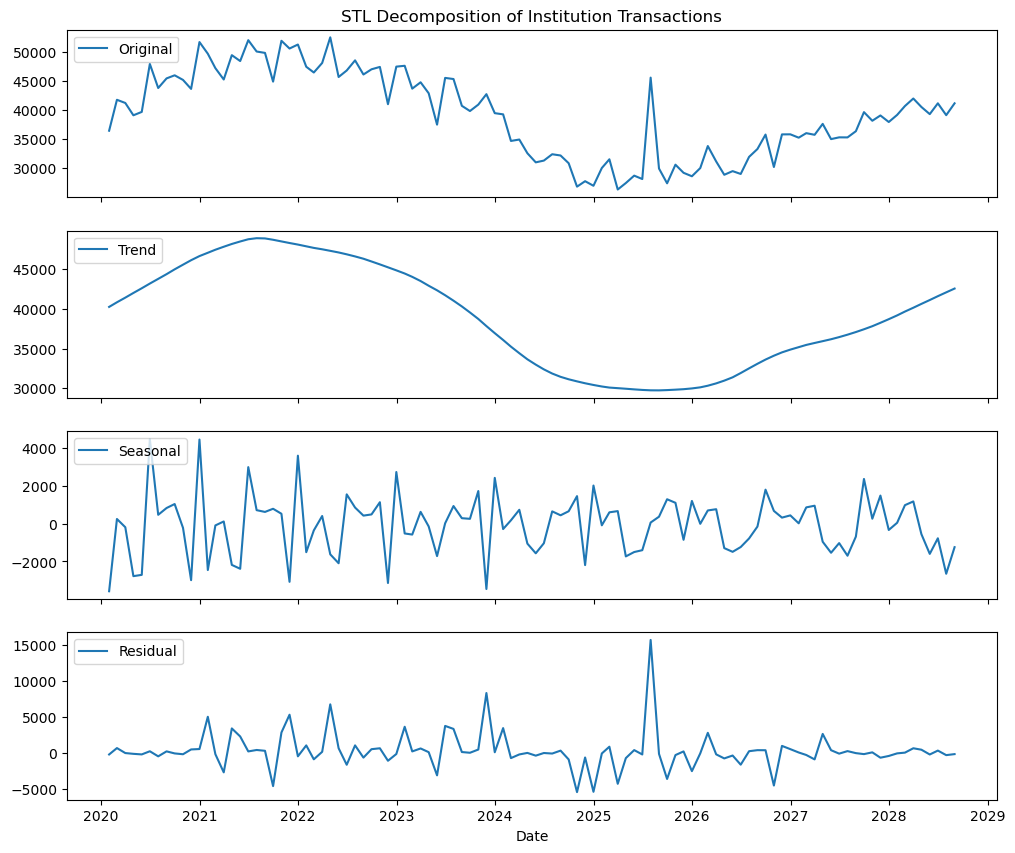

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Sample data for illustration (replace with your actual dataset)
dates = pd.date_range(start='2020-01-01', periods=104, freq='m')
data = {'Date': dates, 'Transactions': [36445, 41752, 41206, 39092, 39671, 47906, 43773, 45422, 
                           45954, 45161, 43621, 51658, 49657, 47182, 45234, 49413, 
                           48398, 51983, 50034, 49799, 44868, 51877, 50548, 51235, 
                           47421, 46434, 48071, 52470, 45663, 46778, 48518, 46092, 
                           46985, 47392, 40996, 47443, 47587, 43666, 44755, 42870, 
                           37487, 45508, 45314, 40717, 39822, 40927, 42718, 39457, 
                           39253, 34690, 34932, 32580, 31016, 31319, 32409, 32193, 
                           30868, 26847, 27783, 26998, 30047, 31543, 26357, 27466, 
                           28736, 28155, 45556, 29955, 27418, 30616, 29224, 28629, 
                           30036, 33815, 31170, 28885, 29510, 29025, 31954, 33305, 
                           35784, 30217, 35814, 35826, 35250, 36027, 35745, 37619, 
                           35005, 35307, 35297, 36360, 39632, 38154, 39063, 37939, 
                           39157, 40682, 41970, 40518, 39292, 41148, 39115, 41145]}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Perform STL decomposition
stl = STL(df['Transactions'], seasonal=7, trend= 15, robust=True)
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Original Series
ax1.plot(df['Transactions'], label='Original')
ax1.legend(loc='upper left')
ax1.set_title('STL Decomposition of Institution Transactions')

# Trend Component
ax2.plot(trend, label='Trend')
ax2.legend(loc='upper left')

# Seasonal Component
ax3.plot(seasonal, label='Seasonal')
ax3.legend(loc='upper left')

# Residual Component
ax4.plot(residual, label='Residual')
ax4.legend(loc='upper left')

plt.xlabel('Date')
plt.show()

